<a href="https://colab.research.google.com/github/sondossalem/tasks/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification of Forest Cover Type
## The Data
We will be using a subset of the Forest Cover Type Dataset obtained from Kaggle:
(https://www.kaggle.com/datasets/uciml/forest-cover-type-dataset)

## Note:
Advances in machine learning have enhanced the ability to predict forest cover types based on various environmental attributes such as elevation, soil type, and climatic conditions. Algorithms can analyze large datasets to identify patterns and improve classification accuracy. Therefore, forest cover type classification is a critical aspect of environmental science that helps in sustainable management of forest resources and conservation of biodiversity.

### Our Goal:
The aim of this project is to build a machine learning pipeline that classifies forest
cover types based on cartographic features such as elevation, soil type, and
climatic conditions. The project will include a comparison of various classification
algorithms and their performance, both before and after hyperparameter tuning.


----
-----
There are many Forest Cover Type Dataset
 on Kaggle ,Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Feature Name</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>Elevation	</td>
      <td>The elevation of the location in meters.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>Aspect
    </td>
      <td>The aspect of the slope in degrees (0-360), indicating the direction the slope faces.	</td>
    </tr>
    <tr>
      <th>2</th>
      <td>Slope	</td>
      <td>The slope of the terrain in degrees, representing how steep the terrain is.</td>
    </tr>
    <tr>
      <th>3</th>
      <td>Horizontal_Distance_To_Hydrology	</td>
      <td>The horizontal distance to hydrology (e.g., rivers, lakes) in meters.	</td>
    </tr>
    <tr>
      <th>4</th>
      <td>Vertical_Distance_To_Hydrology	</td>
      <td>The vertical distance to hydrology, indicating how high or low the location is relative to water.	</td>
    </tr>
    <tr>
      <th>5</th>
      <td>Horizontal_Distance_To_Roadways	</td>
      <td>The horizontal distance to the nearest roadway in meters.</td>
    </tr>
    <tr>
      <th>6</th>
      <td>Hillshade_9am	</td>
      <td>Hillshade index at 9 AM on the summer solstice (0-255), representing sunlight exposure.</td>
    </tr>
    <tr>
      <th>7</th>
      <td>Hillshade_Noon	</td>
      <td>Hillshade index at noon on the summer solstice (0-255).</td>
    </tr>
    <tr>
      <th>8</th>
      <td>Hillshade_3pm</td>
      <td>Hillshade index at 3 PM on the summer solstice (0-255).</td>
    </tr>
    <tr>
      <th>9</th>
      <td>Horizontal_Distance_To_Fire_Points	</td>
      <td>The horizontal distance to the nearest wildfire ignition points in meters.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>Soil_Type32	</td>
      <td>Binary indicator for Soil Type 32, indicating presence (1) or absence (0) of this soil type.</td>
    </tr>
    <tr>
      <th>11</th>
      <td>Soil_Type33</td>
      <td>Binary indicator for Soil Type 33.	</td>
    </tr>
    <tr>
      <th>12</th>
      <td>Soil_Type34	</td>
      <td>Binary indicator for Soil Type 34.	</td>
    </tr>
    <tr>
      <th>13</th>
      <td>Soil_Type35</td>
      <td>Binary indicator for Soil Type 35.	</td>
    </tr>
    <tr>
      <th>14</th>
      <td>Soil_Type36	</td>
      <td>Binary indicator for Soil Type 36.</td>
    </tr>
    <tr>
      <th>15</th>
      <td>Soil_Type37</td>
      <td>Binary indicator for Soil Type 37.	</td>
    </tr>
    <tr>
      <th>16</th>
      <td>Soil_Type38	</td>
      <td>Binary indicator for Soil Type 38.</td>
    </tr>
    <tr>
      <th>17</th>
      <td>Soil_Type39	</td>
      <td>Binary indicator for Soil Type 39.	</td>
    </tr>
    <tr>
      <th>18</th>
      <td>Soil_Type40	</td>
      <td>Binary indicator for Soil Type 40.</td>
    </tr>
    <tr>
      <th>19</th>
      <td>Cover_Type	</td>
      <td>The classification of forest cover type (1 to 7), representing different types of forest ecosystems.	</td>
    </tr>
    <tr>
      
  </tbody>
</table>

---
----

#1-Data Preparation:


### Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

###load the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df= pd.read_csv('/content/drive/MyDrive/covtype.csv')
df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


##Data Exploration

####Show Top 8 Records

In [4]:
df.head(8)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
5,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,2
6,2606,45,7,270,5,633,222,225,138,6256,...,0,0,0,0,0,0,0,0,0,5
7,2605,49,4,234,7,573,222,230,144,6228,...,0,0,0,0,0,0,0,0,0,5


####Show Last 8 Records

In [5]:
df.tail(8)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
581004,2410,158,24,90,24,120,238,236,115,819,...,0,0,0,0,0,0,0,0,0,3
581005,2405,159,22,90,19,120,237,238,119,824,...,0,0,0,0,0,0,0,0,0,3
581006,2401,157,21,90,15,120,238,238,119,830,...,0,0,0,0,0,0,0,0,0,3
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3
581011,2383,165,13,60,4,67,231,244,141,875,...,0,0,0,0,0,0,0,0,0,3


####Shape of dataset

In [6]:
df.shape

(581012, 55)

####Duplicated  rows in the dataset

In [7]:
duplicate=df[df.duplicated()]
duplicate

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type


####Check data types of each column


In [8]:
df.dtypes

,0
Elevation,int64
Aspect,int64
Slope,int64
Horizontal_Distance_To_Hydrology,int64
Vertical_Distance_To_Hydrology,int64
Horizontal_Distance_To_Roadways,int64
Hillshade_9am,int64
Hillshade_Noon,int64
Hillshade_3pm,int64
Horizontal_Distance_To_Fire_Points,int64


####Check for missing values

In [9]:
missing_values = df.isnull().sum()
missing_values

,0
Elevation,0
Aspect,0
Slope,0
Horizontal_Distance_To_Hydrology,0
Vertical_Distance_To_Hydrology,0
Horizontal_Distance_To_Roadways,0
Hillshade_9am,0
Hillshade_Noon,0
Hillshade_3pm,0
Horizontal_Distance_To_Fire_Points,0


####Display summary statistics for a dataframe


In [10]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


####Know the data information in the data set

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

####Visualize Missing Data

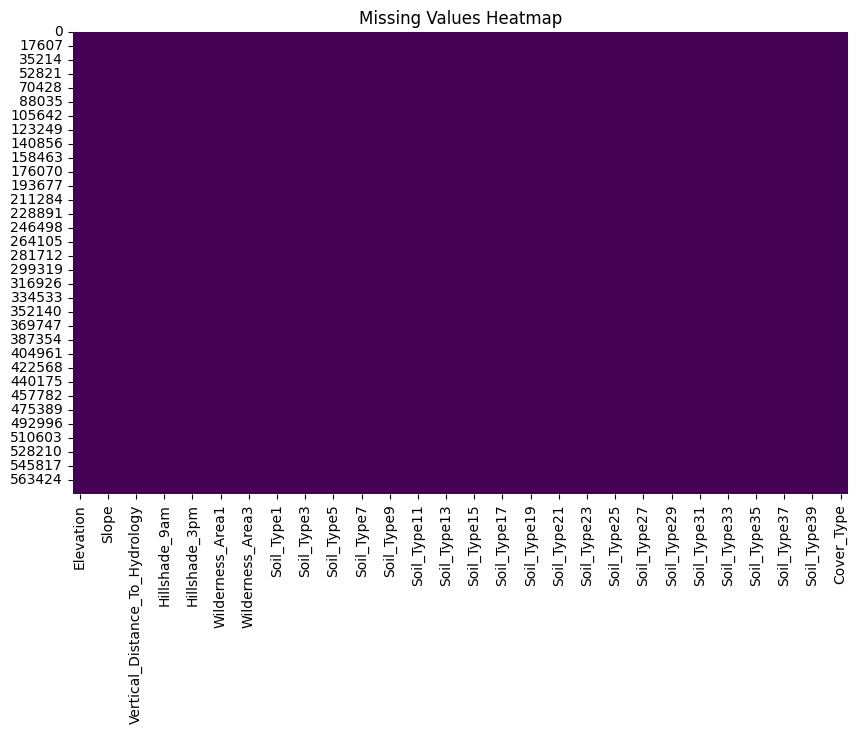

In [12]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

####Handle missing data: Check for any missing values and address them accordingly (if exist)

In [13]:
total_missing = df.isnull().sum().sum()
total_missing

0

###Type of Feature

#####Numerical Features

In [38]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Number of Numerical Features :', len(numeric_features))

Number of Numerical Features : 13


#####Categorical Features

In [15]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Number of Categorical Features :', len(categorical_features))

Number of Categorical Features : 0


#####Discrete Features

In [16]:
discrete_features = [feature for feature in numeric_features if len(df[feature].unique()) <= 25]
print('Number of Discrete Features :', len(discrete_features))

Number of Discrete Features : 45


#####Continuous Features

In [17]:
continuous_features = [feature for feature in numeric_features if len(df[feature].unique()) > 25]
print('Number of Continuous Features :', len(continuous_features))

Number of Continuous Features : 10


####Checking outliers in continuous features

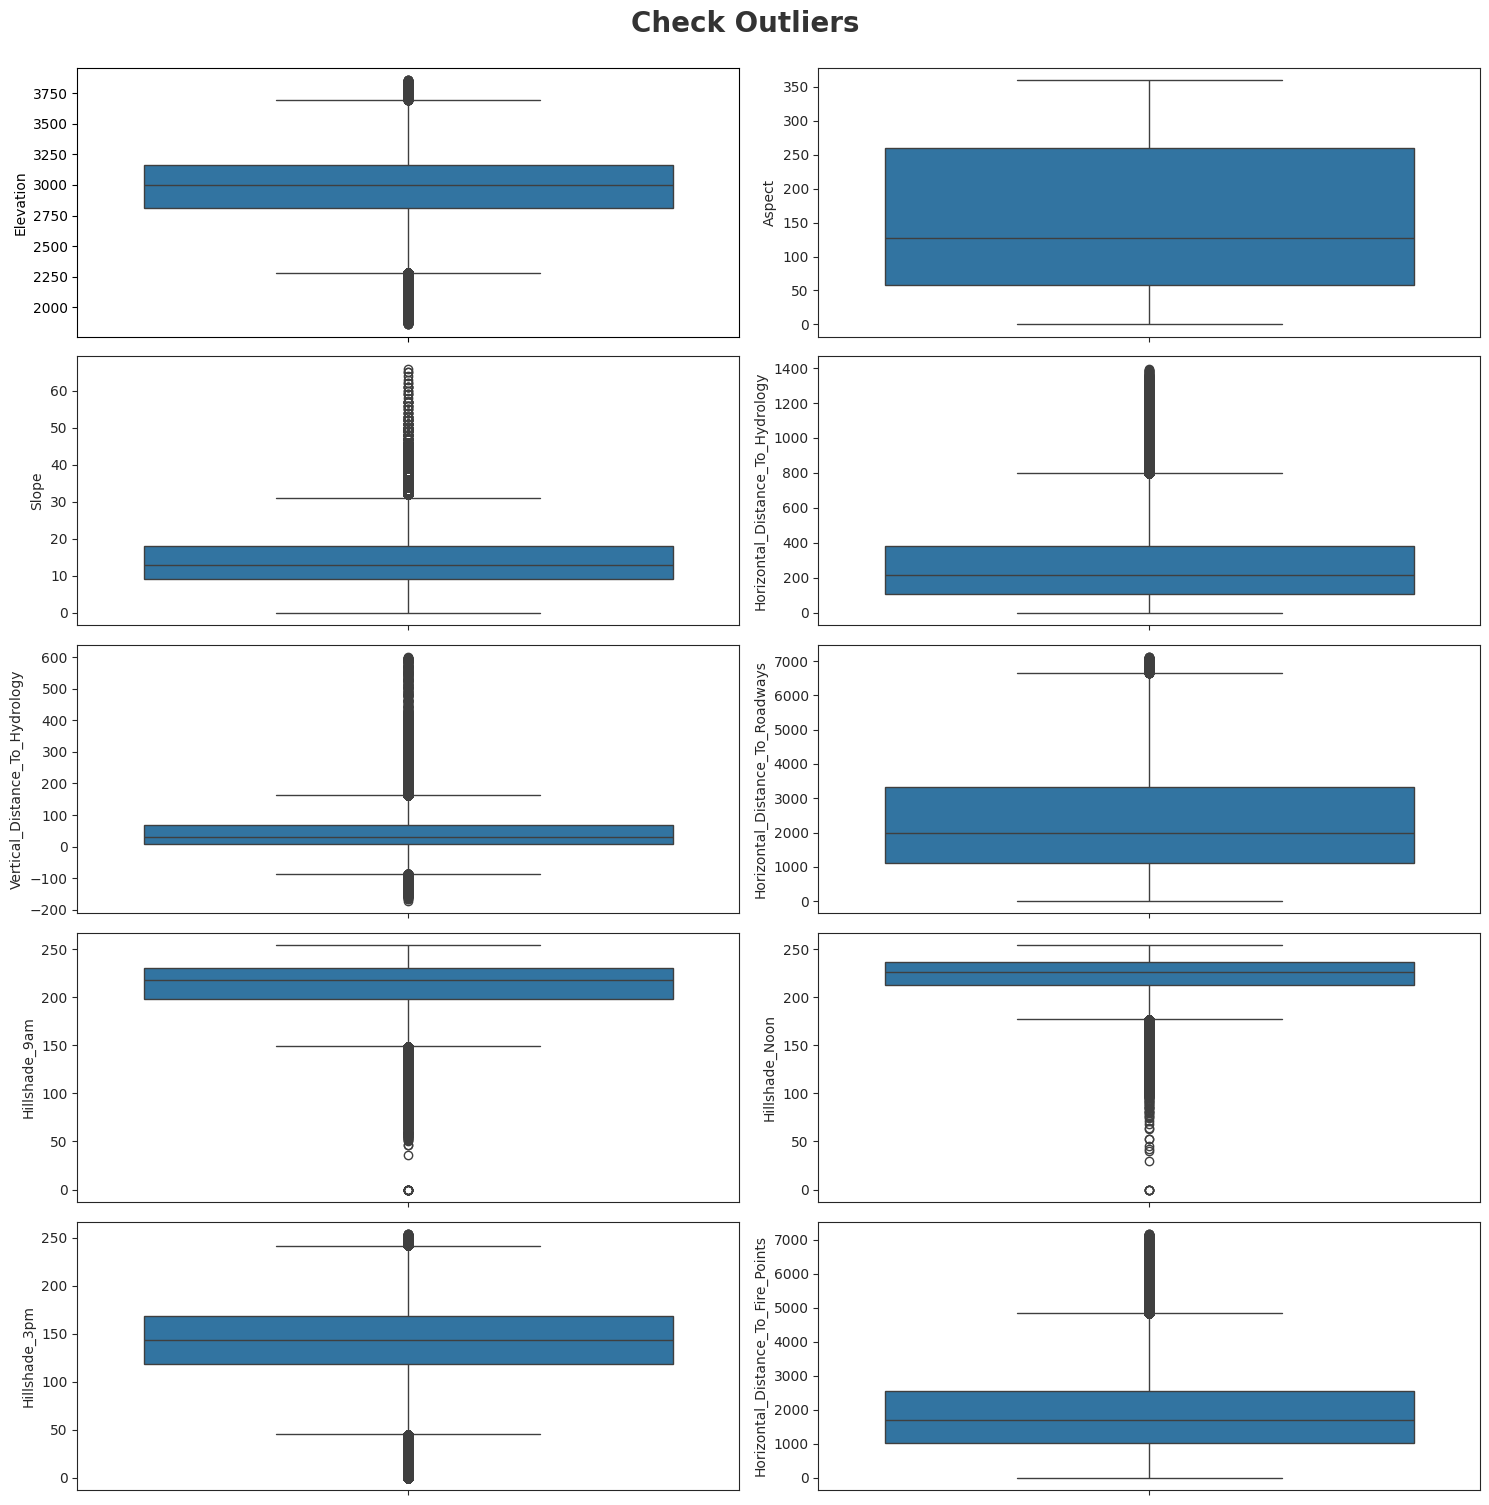

In [18]:
plt.figure(figsize=(15, 15))
plt.suptitle('Check Outliers', fontsize=20, fontweight='bold', alpha=0.8, y=1.0)
for i in range(0, len(continuous_features)):
    plt.subplot(5, 2, i+1)
    sns.set_style('ticks')
    sns.boxplot(df[continuous_features[i]])
    plt.tight_layout()

###Defining the Outlier Detection and Capping Function

In [19]:
df_copy = df.copy()
def detect_and_capping_outliers(col):
    percentile25 = df_copy[col].quantile(0.25)
    percentile75 = df_copy[col].quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr

    df_copy.loc[df_copy[col] > upper_limit, col] = upper_limit
    df_copy.loc[df_copy[col] < lower_limit, col] = lower_limit

    return df_copy

####Applying the Function to Continuous Features

In [20]:
for col in continuous_features:
    detect_and_capping_outliers(col)

<ipython-input-19-5a1397c5e3b8>:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '31.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_copy.loc[df_copy[col] > upper_limit, col] = upper_limit
<ipython-input-19-5a1397c5e3b8>:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '280.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_copy.loc[df_copy[col] > upper_limit, col] = upper_limit
<ipython-input-19-5a1397c5e3b8>:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '241.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_copy.loc[df_copy[col] > upper_limit, col] = upper_limit


####Visualizing Capped Data

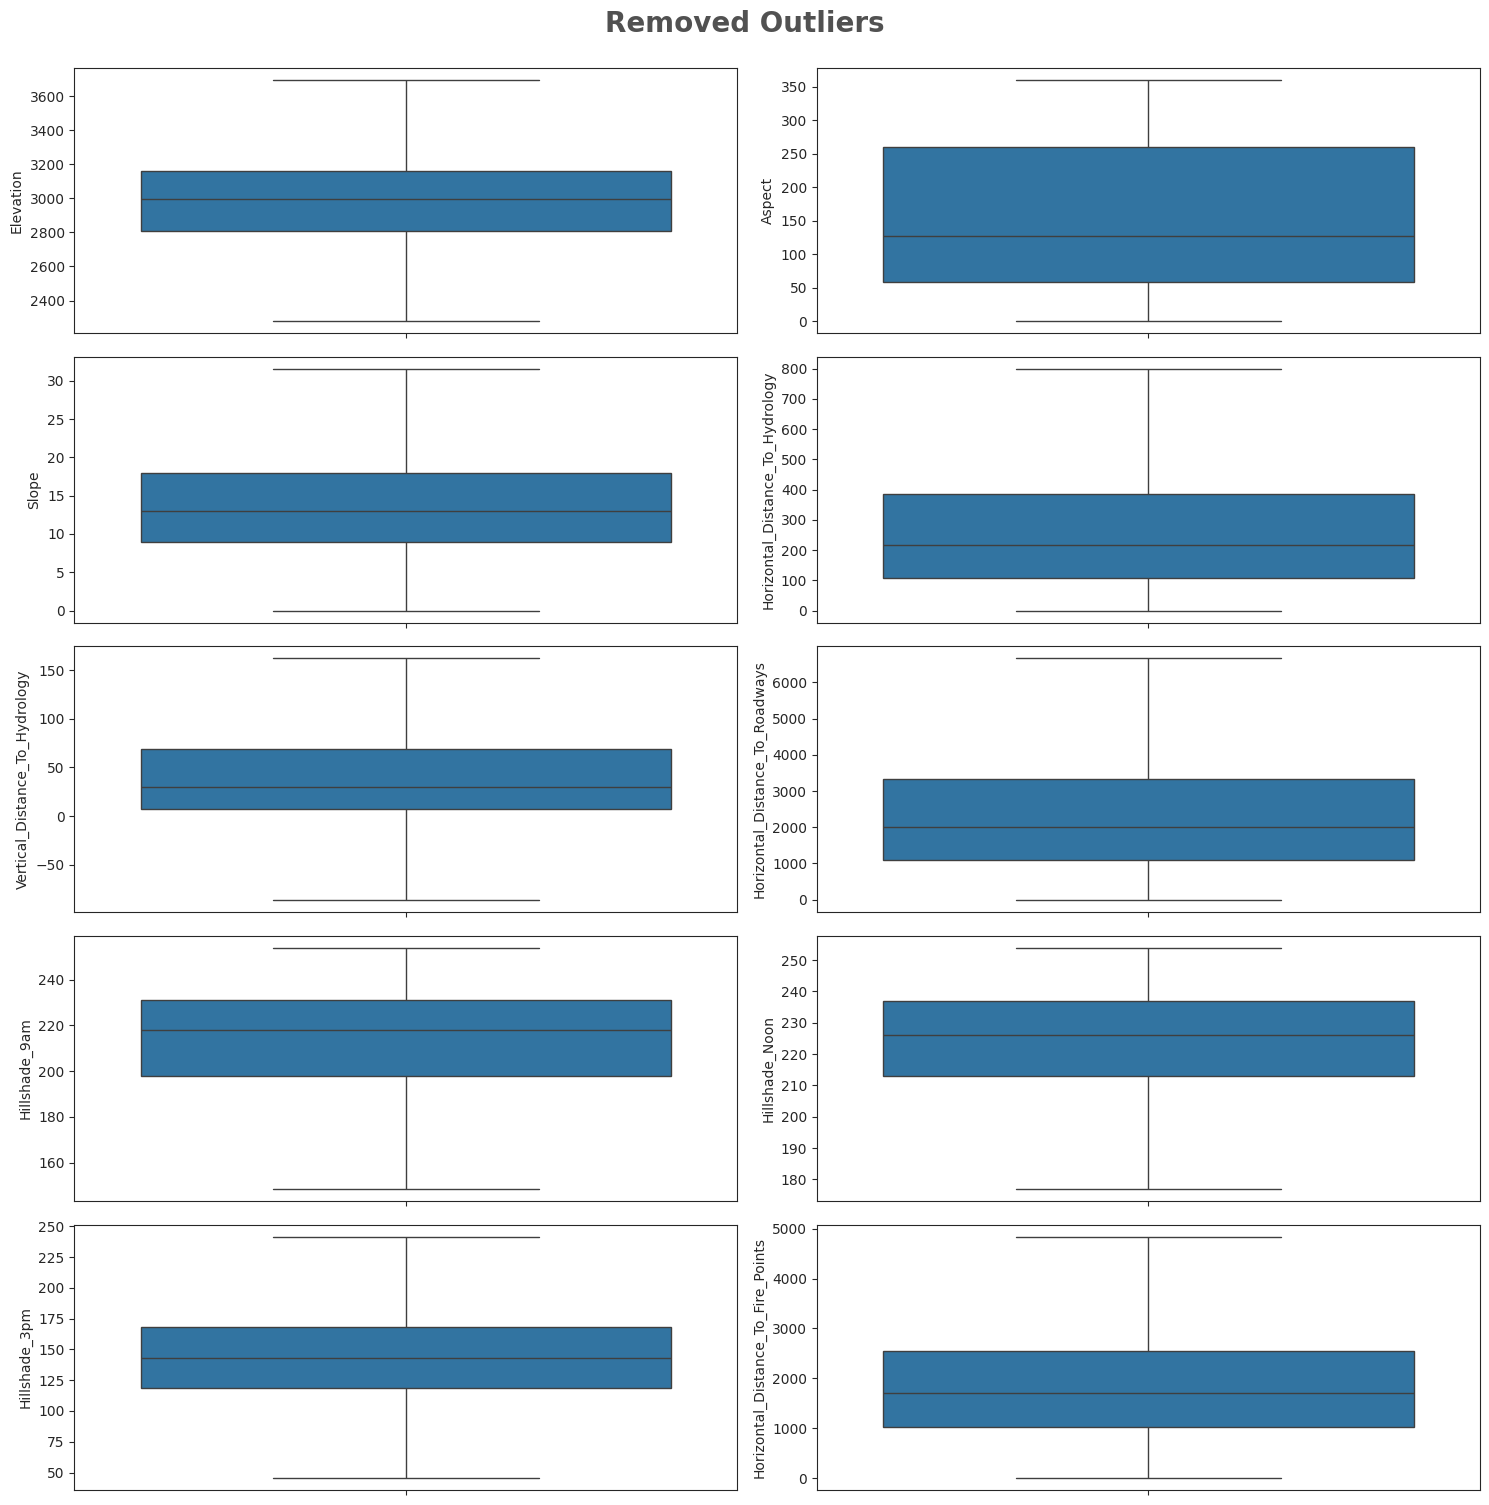

In [21]:
plt.figure(figsize=(15,15))
plt.suptitle('Removed Outliers', fontsize=20, fontweight='bold', alpha=0.8, y=1)
for i in range(0, len(continuous_features)):
    plt.subplot(5, 2, i+1)
    sns.set_style('ticks')
    sns.boxplot(df_copy[continuous_features[i]])
    plt.tight_layout()

###Checking columns name

In [22]:
df_copy.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

###Reverse One-Hot Encoding with Numeric Extraction from Column Names



In [23]:
def split_numbers_chars(row):
    head = row.rstrip('0123456789')
    tail = row[len(head):]
    return head, tail

def reverse_one_hot_encode(dataframe, start_loc, end_loc, numeric_column_name):
    dataframe['String_Column'] = dataframe.iloc[:, start_loc:end_loc].idxmax(1)
    dataframe['Tuple'] = dataframe['String_Column'].apply(split_numbers_chars)
    print(dataframe['Tuple'])
    dataframe[numeric_column_name] = dataframe['Tuple'].apply(lambda x: x[1]).astype('int64')
    dataframe.drop(columns=['String_Column', 'Tuple'], inplace=True)


####Extract Wilderness Area Codes from One-Hot Encoded Columns



In [24]:
reverse_one_hot_encode(df_copy, 10, 13, "wilderness_areas")

0         (Wilderness_Area, 1)
1         (Wilderness_Area, 1)
2         (Wilderness_Area, 1)
3         (Wilderness_Area, 1)
4         (Wilderness_Area, 1)
                  ...         
581007    (Wilderness_Area, 3)
581008    (Wilderness_Area, 3)
581009    (Wilderness_Area, 3)
581010    (Wilderness_Area, 3)
581011    (Wilderness_Area, 3)
Name: Tuple, Length: 581012, dtype: object


####Extract Soil_Type Codes from One-Hot Encoded Columns



In [25]:
reverse_one_hot_encode(df_copy, 14, 53, "Soil_Type")

0         (Soil_Type, 29)
1         (Soil_Type, 29)
2         (Soil_Type, 12)
3         (Soil_Type, 30)
4         (Soil_Type, 29)
               ...       
581007     (Soil_Type, 2)
581008     (Soil_Type, 2)
581009     (Soil_Type, 2)
581010     (Soil_Type, 2)
581011     (Soil_Type, 2)
Name: Tuple, Length: 581012, dtype: object


####Select Relevant Features for Model Input



In [26]:
feature_names = continuous_features + ["wilderness_areas"] + ["Soil_Type"] + ["Cover_Type"]
all_features_df = df_copy[feature_names]
all_features_df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,wilderness_areas,Soil_Type,Cover_Type
0,2596,51,3.0,258,0,510,221.0,232,148.0,4839,1,29,5
1,2590,56,2.0,212,-6,390,220.0,235,151.0,4839,1,29,5
2,2804,139,9.0,268,65,3180,234.0,238,135.0,4839,1,12,2
3,2785,155,18.0,242,118,3090,238.0,238,122.0,4839,1,30,2
4,2595,45,2.0,153,-1,391,220.0,234,150.0,4839,1,29,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20.0,85,17,108,240.0,237,118.0,837,3,2,3
581008,2391,152,19.0,67,12,95,240.0,237,119.0,845,3,2,3
581009,2386,159,17.0,60,7,90,236.0,241,130.0,854,3,2,3
581010,2384,170,15.0,60,5,90,230.0,245,143.0,864,3,2,3


#### Handling Imbalanced Target Variable

In [27]:
all_features_df = all_features_df.copy()
all_features_df["Cover_Type"] = all_features_df["Cover_Type"] - 1

##check multicollinearity in numerical features

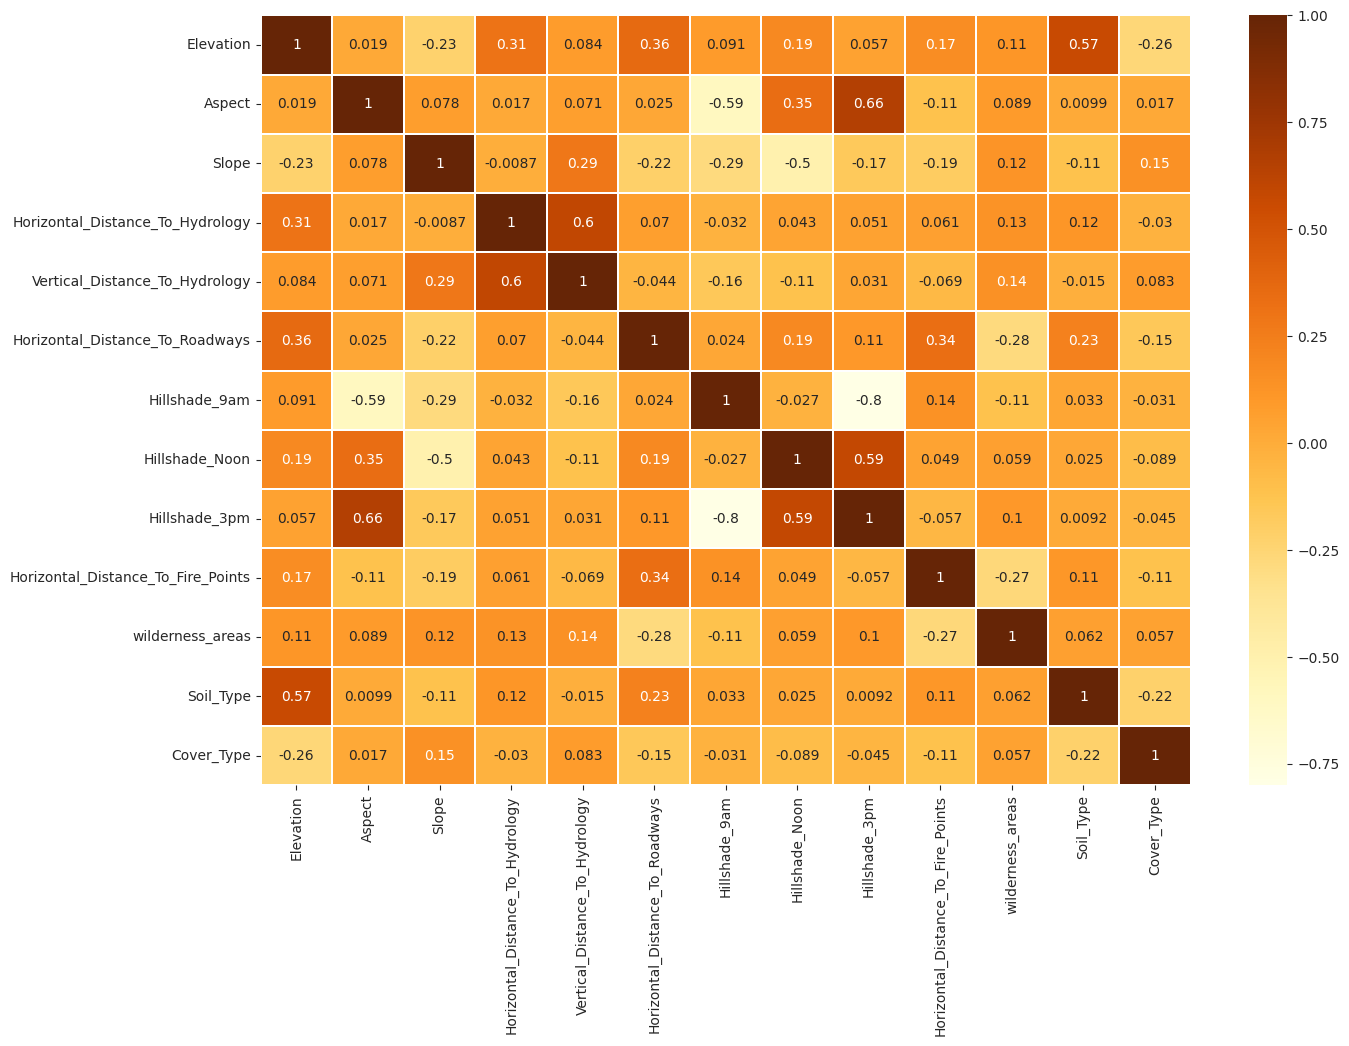

In [28]:
plt.figure(figsize=(15, 10))
sns.heatmap(all_features_df.corr(), annot=True, linewidths=.3, cmap="YlOrBr")
plt.show()

In [29]:
df[list(df[continuous_features])[1:]].corr()

,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
Aspect,1.000000,0.078728,0.017376,0.070305,0.025121,-0.579273,0.336103,0.646944,-0.109172
Slope,0.078728,1.000000,-0.010607,0.274976,-0.215914,-0.327199,-0.526911,-0.175854,-0.185662
Horizontal_Distance_To_Hydrology,0.017376,-0.010607,1.000000,0.606236,0.072030,-0.027088,0.046790,0.052330,0.051874
Vertical_Distance_To_Hydrology,0.070305,0.274976,0.606236,1.000000,-0.046372,-0.166333,-0.110957,0.034902,-0.069913
Horizontal_Distance_To_Roadways,0.025121,-0.215914,0.072030,-0.046372,1.000000,0.034349,0.189461,0.106119,0.331580
Hillshade_9am,-0.579273,-0.327199,-0.027088,-0.166333,0.034349,1.000000,0.010037,-0.780296,0.132669
Hillshade_Noon,0.336103,-0.526911,0.046790,-0.110957,0.189461,0.010037,1.000000,0.594274,0.057329
Hillshade_3pm,0.646944,-0.175854,0.052330,0.034902,0.106119,-0.780296,0.594274,1.000000,-0.047981
Horizontal_Distance_To_Fire_Points,-0.109172,-0.185662,0.051874,-0.069913,0.331580,0.132669,0.057329,-0.047981,1.000000


###Analyze Distribution of Cover Types in Dataset

In [30]:
all_features_df["Cover_Type"].value_counts()

,count
Cover_Type,
1,283301
0,211840
2,35754
6,20510
5,17367
4,9493
3,2747


###Visualize Class Distribution of Cover Types



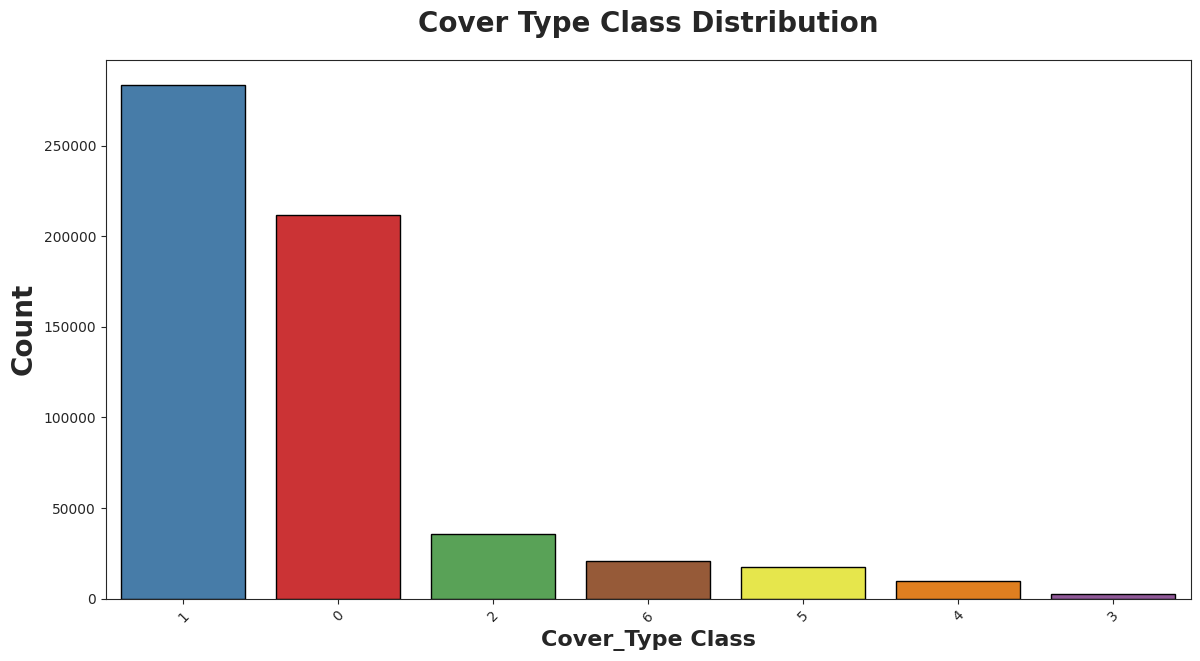

In [31]:
plt.subplots(figsize=(14, 7))
sns.countplot(x="Cover_Type",data=all_features_df, ec="black", palette="Set1", order=all_features_df["Cover_Type"].value_counts().index,
    hue="Cover_Type", dodge=False)
plt.legend([],[], frameon=False)
plt.title("Cover Type Class Distribution", weight="bold", fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("Cover_Type Class", weight="bold", fontsize=16)
plt.xticks(rotation=45)
plt.show()

###Feature Scaling


In [32]:
df=all_features_df
df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,wilderness_areas,Soil_Type,Cover_Type
0,2596,51,3.0,258,0,510,221.0,232,148.0,4839,1,29,4
1,2590,56,2.0,212,-6,390,220.0,235,151.0,4839,1,29,4
2,2804,139,9.0,268,65,3180,234.0,238,135.0,4839,1,12,1
3,2785,155,18.0,242,118,3090,238.0,238,122.0,4839,1,30,1
4,2595,45,2.0,153,-1,391,220.0,234,150.0,4839,1,29,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20.0,85,17,108,240.0,237,118.0,837,3,2,2
581008,2391,152,19.0,67,12,95,240.0,237,119.0,845,3,2,2
581009,2386,159,17.0,60,7,90,236.0,241,130.0,854,3,2,2
581010,2384,170,15.0,60,5,90,230.0,245,143.0,864,3,2,2


###Univariate Analysis of Numerical Features

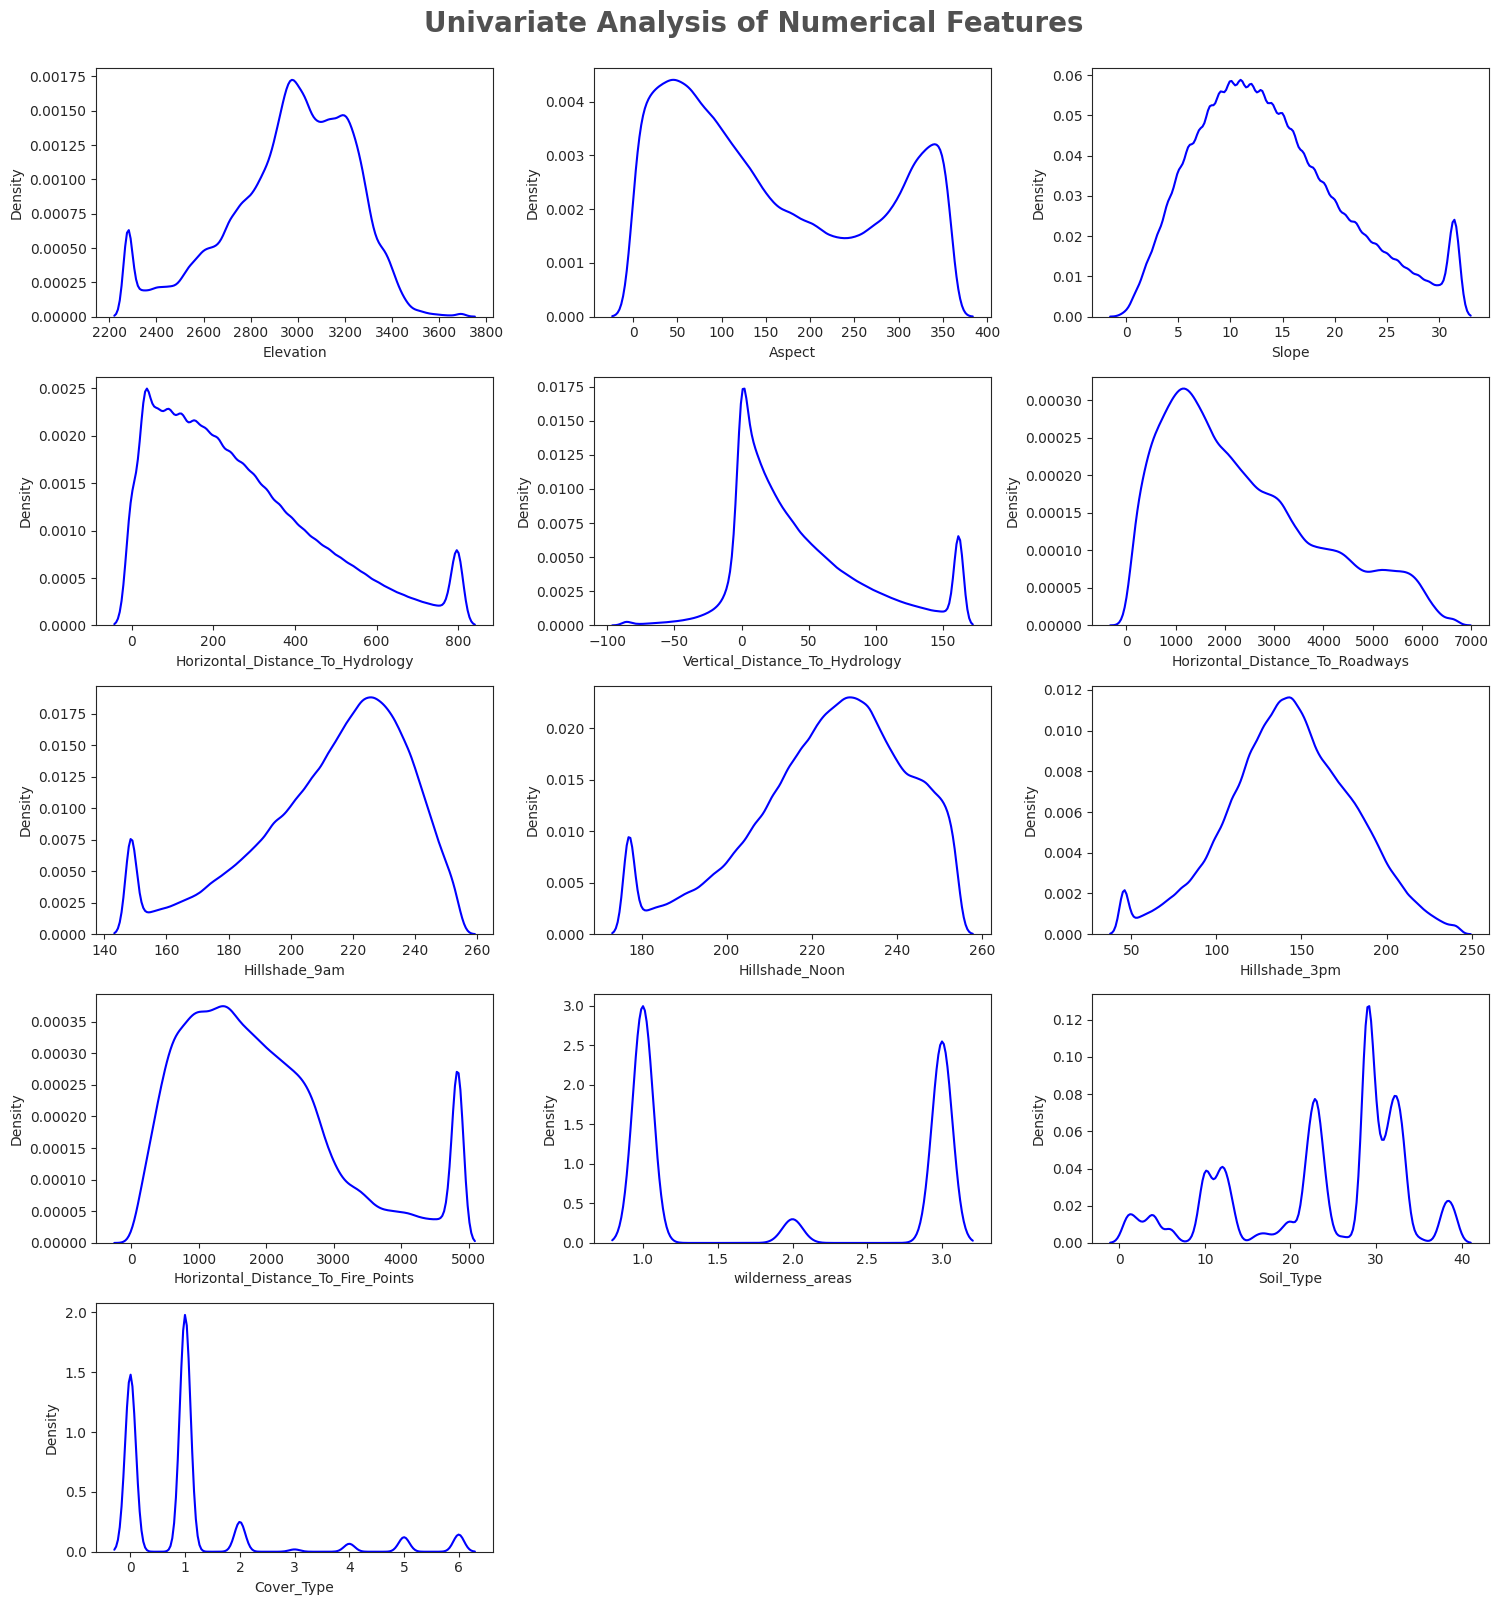

In [39]:
plt.figure(figsize=(15, 16))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]], color='blue')
    plt.xlabel(numeric_features[i])
plt.tight_layout()

####Data Splitting and Scaling for Model Training and Testing

In [33]:
def split_and_scale_data(df):
    # Split data into features and target
    X = df.drop("Cover_Type", axis=1)
    Y = df["Cover_Type"]

    # Split data into training and testing sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    # Scale data using standard scaler
    scaler = StandardScaler()
    scaler.fit(X_train)

    # Transform the training and testing sets
    X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

    return X_train, X_test, Y_train, Y_test


###Model Evaluation with Confusion Matrix and Classification Report




In [34]:
def evaluate_model(model, balanced_class, X_test, y_test):
    # Calculate model accuracy on test data
    model_accuracy = model.score(X_test, Y_test)
    print("Accuracy ({}): {:.2f}%".format(balanced_class, model_accuracy * 100))

    # Make predictions on the test set
    Y_pred = model.predict(X_test)

    # Generate confusion matrix and classification report
    cm = confusion_matrix(Y_test, Y_pred)
    cl_report = classification_report(Y_test, Y_pred)

    # Plot the confusion matrix as a heatmap
    plt.figure(figsize=(8, 8))
    sns.heatmap(cm, annot=True, fmt='g', vmin=0, cbar=False, cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

    # Print the classification report
    print("Classification Report:\n", cl_report)

    # Return the model accuracy
    return model_accuracy


####Training and Evaluating Random Forest Model on Imbalanced Data



Accuracy (Imbalanced): 96.16%


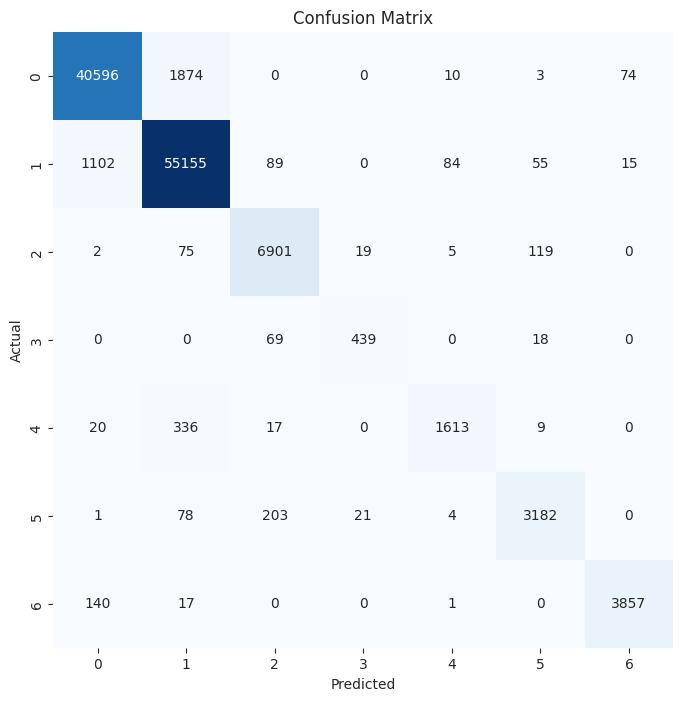

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96     42557
           1       0.96      0.98      0.97     56500
           2       0.95      0.97      0.96      7121
           3       0.92      0.83      0.87       526
           4       0.94      0.81      0.87      1995
           5       0.94      0.91      0.93      3489
           6       0.98      0.96      0.97      4015

    accuracy                           0.96    116203
   macro avg       0.95      0.92      0.93    116203
weighted avg       0.96      0.96      0.96    116203



0.9616188910785436

In [35]:
imbalanced_data = df
X_train, X_test, Y_train, Y_test = split_and_scale_data(df)
model_1 = RandomForestClassifier()
model_1.fit(X_train, Y_train)
evaluate_model(model_1, "Imbalanced", X_test, Y_test)

####Training and Evaluating LogisticRegression Model on Imbalanced Data



Accuracy (Imbalanced): 71.05%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


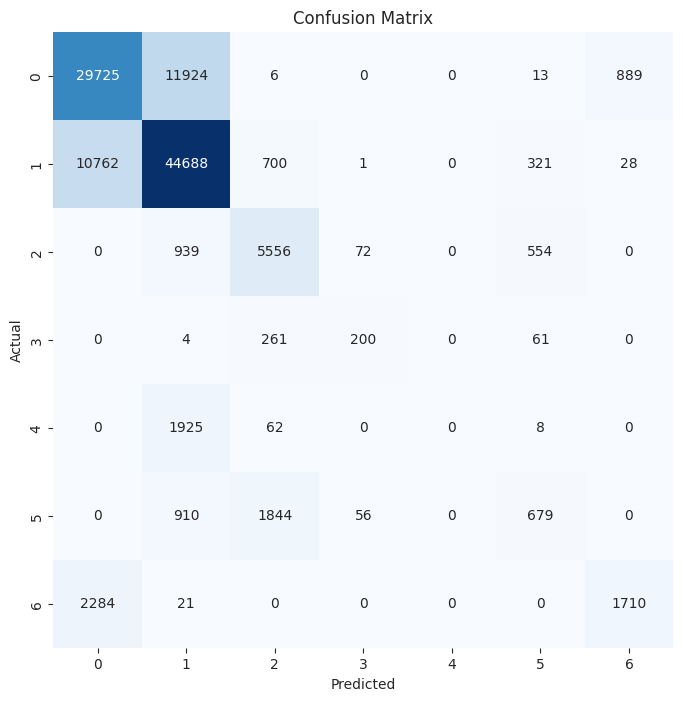

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.70      0.70     42557
           1       0.74      0.79      0.76     56500
           2       0.66      0.78      0.71      7121
           3       0.61      0.38      0.47       526
           4       0.00      0.00      0.00      1995
           5       0.42      0.19      0.26      3489
           6       0.65      0.43      0.51      4015

    accuracy                           0.71    116203
   macro avg       0.54      0.47      0.49    116203
weighted avg       0.69      0.71      0.70    116203



0.7104635852774885

In [ ]:
model_2 = LogisticRegression(max_iter=200)
model_2.fit(X_train, Y_train)
evaluate_model(model_2, "Imbalanced", X_test, Y_test)

####Training and Evaluating KNeighbors Model on Imbalanced Data



Accuracy (Imbalanced): 92.14%


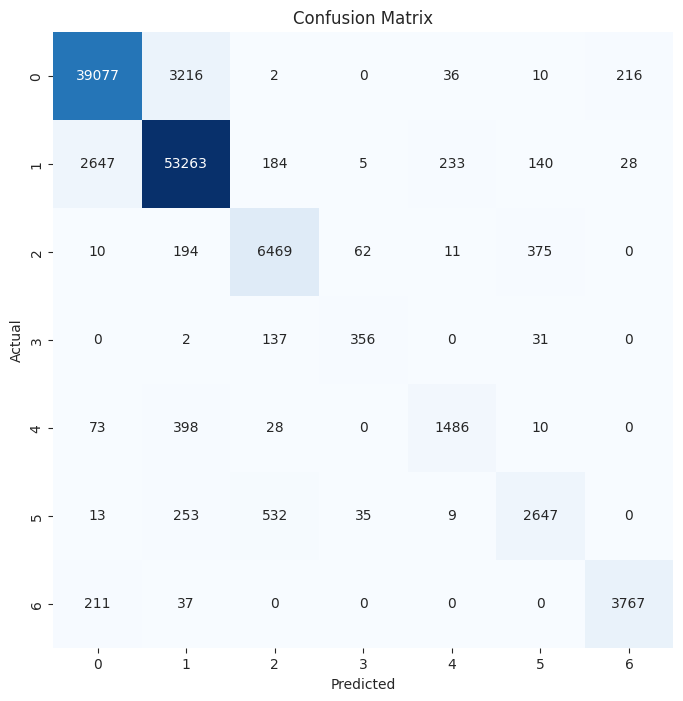

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.92     42557
           1       0.93      0.94      0.94     56500
           2       0.88      0.91      0.89      7121
           3       0.78      0.68      0.72       526
           4       0.84      0.74      0.79      1995
           5       0.82      0.76      0.79      3489
           6       0.94      0.94      0.94      4015

    accuracy                           0.92    116203
   macro avg       0.87      0.84      0.86    116203
weighted avg       0.92      0.92      0.92    116203



0.9213617548600295

In [ ]:
model_3 = KNeighborsClassifier()
model_3.fit(X_train, Y_train)
evaluate_model(model_3, "Imbalanced", X_test, Y_test)


####Training and Evaluating DecisionTree  Model on Imbalanced Data


Accuracy (Imbalanced): 93.31%


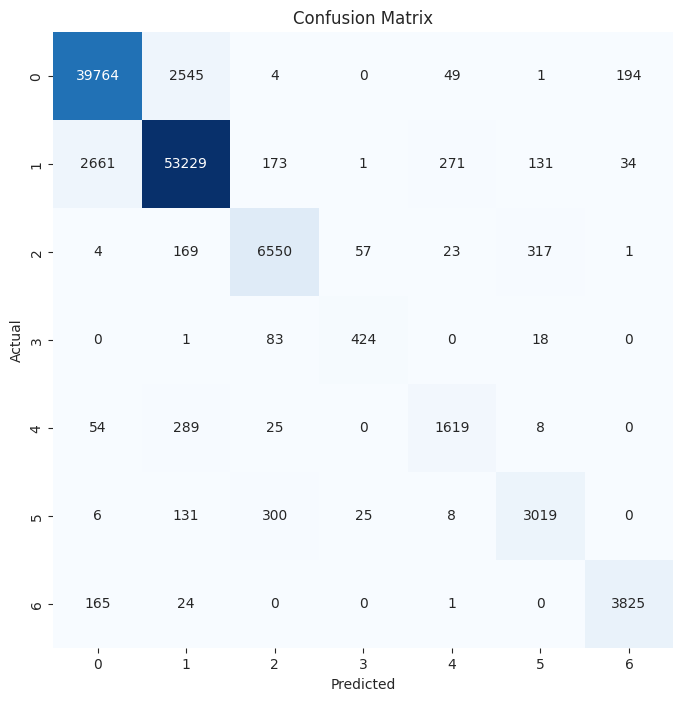

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93     42557
           1       0.94      0.94      0.94     56500
           2       0.92      0.92      0.92      7121
           3       0.84      0.81      0.82       526
           4       0.82      0.81      0.82      1995
           5       0.86      0.87      0.86      3489
           6       0.94      0.95      0.95      4015

    accuracy                           0.93    116203
   macro avg       0.89      0.89      0.89    116203
weighted avg       0.93      0.93      0.93    116203



0.9331084395411479

In [ ]:
model_4 = DecisionTreeClassifier()
model_4.fit(X_train, Y_train)
evaluate_model(model_4, "Imbalanced", X_test, Y_test)


###Training and Evaluating Multiple Classifiers for Comparative Analysis



In [ ]:
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'k-NN': KNeighborsClassifier()
}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(X_train, Y_train)
    y_pred = clf.predict(X_test)
    print(f"{name} Classification Report:\n", classification_report(Y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.70      0.70     42557
           1       0.74      0.79      0.76     56500
           2       0.66      0.78      0.71      7121
           3       0.61      0.38      0.47       526
           4       0.00      0.00      0.00      1995
           5       0.42      0.19      0.26      3489
           6       0.65      0.43      0.51      4015

    accuracy                           0.71    116203
   macro avg       0.54      0.47      0.49    116203
weighted avg       0.69      0.71      0.70    116203

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93     42557
           1       0.94      0.94      0.94     56500
           2       0.92      0.92      0.92      7121
           3       0.83      0.81      0.82       526
           4       0.82      0.81      0.82      1

###Random under-sampling

* It consists of removing samples from the majority class (under-sampling)
Undersample the majority class


In [40]:
under_sampled_data =df.copy()

In [41]:
print("Original class distribution:")
print(under_sampled_data['Cover_Type'].value_counts())

Original class distribution:
Cover_Type
1    283301
0    211840
2     35754
6     20510
5     17367
4      9493
3      2747
Name: count, dtype: int64


In [42]:
minimum_class_size = np.min(under_sampled_data['Cover_Type'].value_counts().values)
print("Size of smallest class:", minimum_class_size)

Size of smallest class: 2747


In [44]:
class_subsets = [under_sampled_data.query("Cover_Type == " + str(i)) for i in range(7)]
class_subsets[0]

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,wilderness_areas,Soil_Type,Cover_Type
40,2699,347,3.0,0,0,2096,213.0,234,159.0,4839,1,20,0
51,2739,323,25.0,85,43,3118,149.0,205,192.0,4839,1,29,0
52,2696,72,2.0,30,0,3271,222.0,234,149.0,4839,1,30,0
55,2722,315,24.0,30,19,3216,148.5,212,200.0,4839,1,16,0
67,2919,13,13.0,90,6,5321,207.0,214,142.0,4060,1,29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
565432,2826,72,14.0,67,13,2984,235.0,213,106.0,2082,3,24,0
565433,2820,69,14.0,42,7,2954,234.0,211,106.0,2065,3,24,0
565434,2812,67,16.0,30,0,2925,234.0,206,99.0,2047,3,24,0
565527,2832,45,17.0,85,19,2989,222.0,200,106.0,2058,3,24,0


###Undersample the majority class

* We will go through the each class subsets and sample 2747 records

In [47]:
# Create a list of data subsets for each class with balanced sample size
class_subsets = [under_sampled_data.query("Cover_Type == " + str(i)) for i in range(7)]

# Sample each class to the size of the smallest class
minimum_class_size = min([len(subset) for subset in class_subsets])  # Find the minimum class size
for i in range(7):
    class_subsets[i] = class_subsets[i].sample(minimum_class_size)

# Concatenate the subsets and shuffle the resulting dataset
under_sampled_data = pd.concat(class_subsets, axis=0).sample(frac=1.0).reset_index(drop=True)


In [48]:
under_sampled_data['Cover_Type'].value_counts()

,count
Cover_Type,
6,2747
1,2747
5,2747
4,2747
0,2747
3,2747
2,2747


In [43]:
class_subsets = [
    under_sampled_data[under_sampled_data['Cover_Type'] == i].sample(minimum_class_size, random_state=42)
    for i in under_sampled_data['Cover_Type'].unique()
]

In [ ]:
under_sampled_data_balanced = pd.concat(class_subsets).reset_index(drop=True)
print("New class distribution after under-sampling:")
print(under_sampled_data_balanced['Cover_Type'].value_counts())

New class distribution after under-sampling:
Cover_Type
4    2747
1    2747
0    2747
6    2747
2    2747
5    2747
3    2747
Name: count, dtype: int64


Accuracy (under sampled): 86.90%


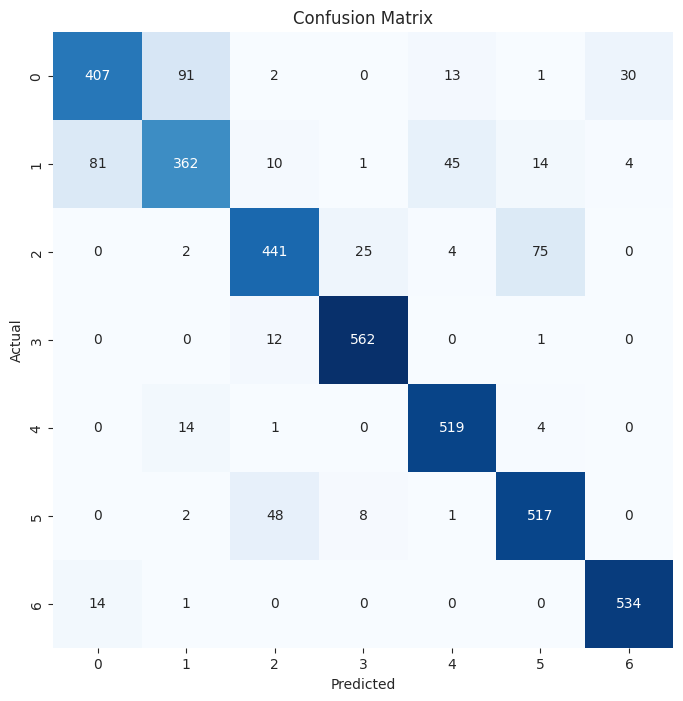

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.75      0.78       544
           1       0.77      0.70      0.73       517
           2       0.86      0.81      0.83       547
           3       0.94      0.98      0.96       575
           4       0.89      0.96      0.93       538
           5       0.84      0.90      0.87       576
           6       0.94      0.97      0.96       549

    accuracy                           0.87      3846
   macro avg       0.87      0.87      0.86      3846
weighted avg       0.87      0.87      0.87      3846



0.8689547581903276

In [59]:
X_train, X_test, Y_train, Y_test = split_and_scale_data(under_sampled_data)
model_1 = RandomForestClassifier()
model_1.fit(X_train, Y_train)
evaluate_model(model_1, "under sampled", X_test, Y_test)


###Random over-sampling

* It consists of adding more examples from the minority class (over-sampling).

In [52]:
# Make a copy of the original dataset
over_sampled_data = all_features_df.copy()

# Determine the maximum class size for oversampling
maximum_class_size = np.max(over_sampled_data['Cover_Type'].value_counts().values)
print("Size of largest class:", maximum_class_size)

Size of largest class: 283301


In [57]:
over_sampled_data['Cover_Type'].value_counts()

,count
Cover_Type,
3,283301
5,283301
0,283301
4,283301
1,283301
2,283301
6,283301


**Oversampling the minority class**
* We will go through the each class subsets and sample 2747 records.

In [55]:
# Create a list of data subsets for each class with balanced sample size
class_subsets = [over_sampled_data.query("Cover_Type == " + str(i)) for i in range(7)]

# Find the maximum class size
maximum_class_size = max([len(subset) for subset in class_subsets])

# Oversample each class to the size of the largest class
for i in range(7):
    class_subsets[i] = class_subsets[i].sample(maximum_class_size, replace=True)

# Concatenate the subsets and shuffle the resulting dataset
over_sampled_data = pd.concat(class_subsets, axis=0).sample(frac=1.0).reset_index(drop=True)


Accuracy (Oversample): 99.58%


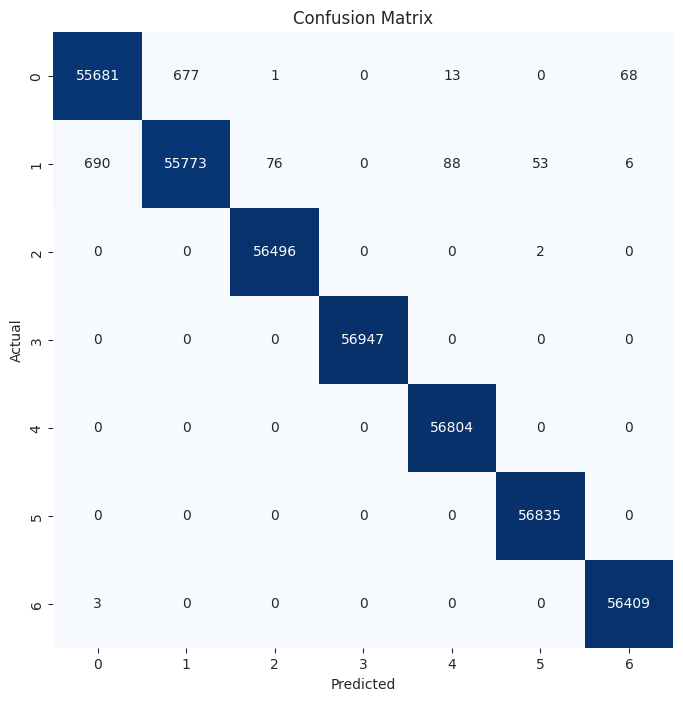

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     56440
           1       0.99      0.98      0.99     56686
           2       1.00      1.00      1.00     56498
           3       1.00      1.00      1.00     56947
           4       1.00      1.00      1.00     56804
           5       1.00      1.00      1.00     56835
           6       1.00      1.00      1.00     56412

    accuracy                           1.00    396622
   macro avg       1.00      1.00      1.00    396622
weighted avg       1.00      1.00      1.00    396622



0.9957717927901125

In [58]:
X_train, X_test, Y_train, Y_test = split_and_scale_data(over_sampled_data)
model_1 = RandomForestClassifier()
model_1.fit(X_train, Y_train)
evaluate_model(model_1, "Oversample", X_test, Y_test)

Accuracy (over sample): 67.94%


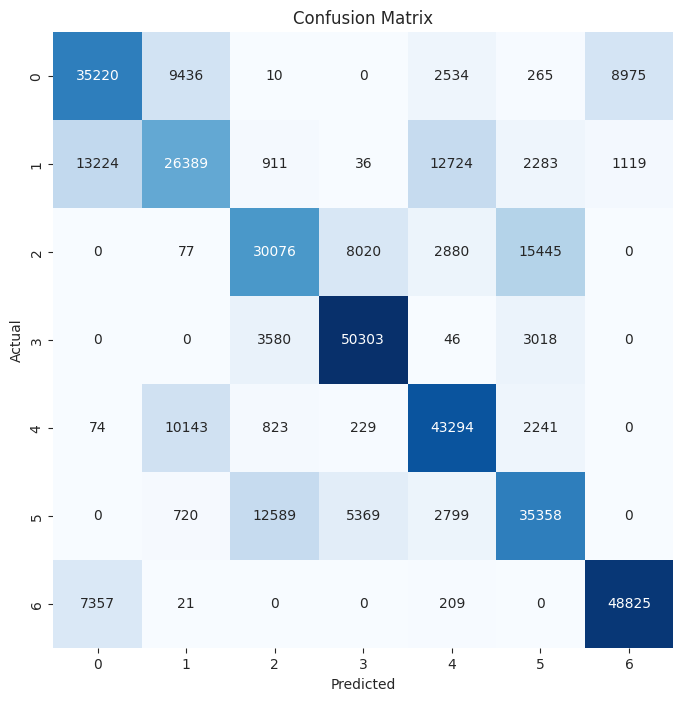

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.62      0.63     56440
           1       0.56      0.47      0.51     56686
           2       0.63      0.53      0.58     56498
           3       0.79      0.88      0.83     56947
           4       0.67      0.76      0.71     56804
           5       0.60      0.62      0.61     56835
           6       0.83      0.87      0.85     56412

    accuracy                           0.68    396622
   macro avg       0.67      0.68      0.67    396622
weighted avg       0.67      0.68      0.67    396622



0.6794000332810586

In [64]:
X_train, X_test, Y_train, Y_test = split_and_scale_data(over_sampled_data)
model_2 = LogisticRegression(max_iter=200)
model_2.fit(X_train, Y_train)
evaluate_model(model_2, "over sample", X_test, Y_test)

Accuracy (over sample): 98.09%


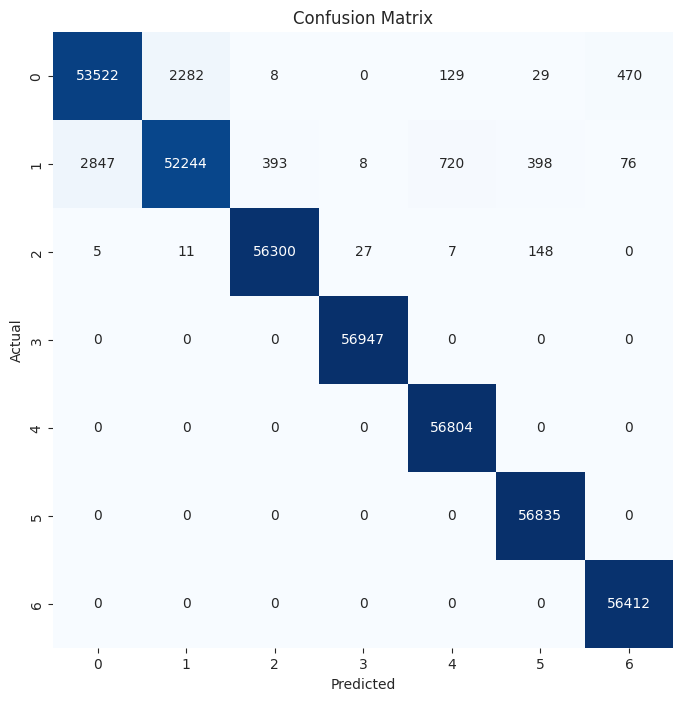

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95     56440
           1       0.96      0.92      0.94     56686
           2       0.99      1.00      0.99     56498
           3       1.00      1.00      1.00     56947
           4       0.99      1.00      0.99     56804
           5       0.99      1.00      0.99     56835
           6       0.99      1.00      1.00     56412

    accuracy                           0.98    396622
   macro avg       0.98      0.98      0.98    396622
weighted avg       0.98      0.98      0.98    396622



0.9809440726938999

In [65]:
X_train, X_test, Y_train, Y_test = split_and_scale_data(over_sampled_data)
model_3 = KNeighborsClassifier()
model_3.fit(X_train, Y_train)
evaluate_model(model_3, "over sample", X_test, Y_test)

Accuracy (over sample): 99.19%


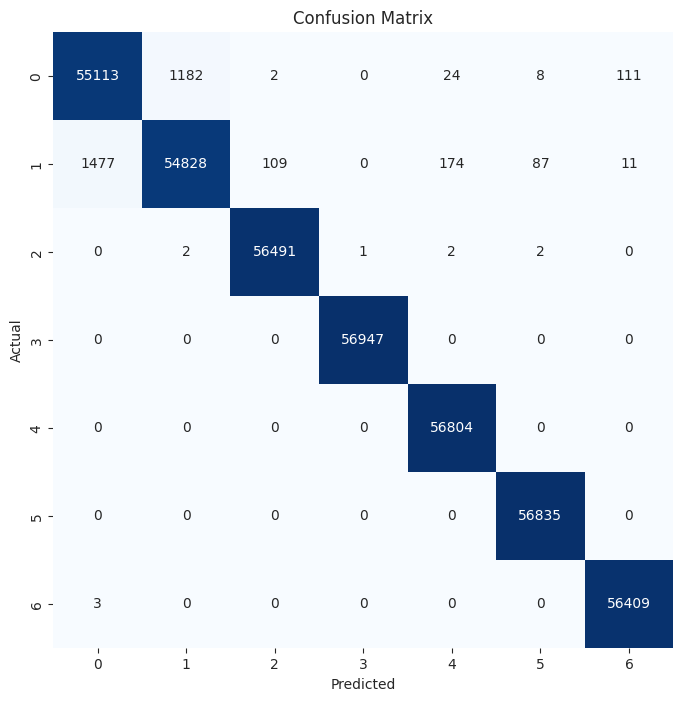

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98     56440
           1       0.98      0.97      0.97     56686
           2       1.00      1.00      1.00     56498
           3       1.00      1.00      1.00     56947
           4       1.00      1.00      1.00     56804
           5       1.00      1.00      1.00     56835
           6       1.00      1.00      1.00     56412

    accuracy                           0.99    396622
   macro avg       0.99      0.99      0.99    396622
weighted avg       0.99      0.99      0.99    396622



0.9919444710580856

In [66]:
X_train, X_test, Y_train, Y_test = split_and_scale_data(over_sampled_data)
model_4 = DecisionTreeClassifier()
model_4.fit(X_train, Y_train)
evaluate_model(model_4, "over sample", X_test, Y_test)

#### Define parameter grids for each model


In [ ]:
param_grid_lr = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}

# Define the models to evaluate
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'k-Nearest Neighbors': KNeighborsClassifier()
}

# Dictionaries to store the best estimators and their performance metrics
best_estimators = {}
model_performance = {}

# Perform hyperparameter tuning and evaluation for each model
for model_name, model in models.items():
    if model_name == 'Logistic Regression':
        search = GridSearchCV(model, param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)
    elif model_name == 'Decision Tree':
        search = GridSearchCV(model, param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)
    elif model_name == 'Random Forest':
        search = RandomizedSearchCV(model, param_grid_rf, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
    elif model_name == 'k-Nearest Neighbors':
        search = GridSearchCV(model, param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)

    # Fit the search to find the best hyperparameters
    search.fit(X_train, Y_train)
    best_estimators[model_name] = search.best_estimator_

    # Evaluate the best model on the test set
    y_pred = search.best_estimator_.predict(X_test)
    accuracy = accuracy_score(Y_test, y_pred)
    precision = precision_score(Y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(Y_test, y_pred, average='weighted')
    f1 = f1_score(Y_test, y_pred, average='weighted')

    # Store performance metrics
    model_performance[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

    # Print results for each model
    print(f"{model_name} - Best Parameters: {search.best_params_}")
    print(f"Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}")
    print("-" * 50)

# Display the performance of each model in a summarized form
print("Model Performance Summary:")
for model_name, metrics in model_performance.items():
    print(f"{model_name}:")
    for metric, score in metrics.items():
        print(f"  {metric}: {score:.2f}")
    print("-" * 30)


Logistic Regression - Best Parameters: {'C': 1, 'solver': 'saga'}
Accuracy: 0.71, Precision: 0.69, Recall: 0.71, F1 Score: 0.70
--------------------------------------------------
Decision Tree - Best Parameters: {'max_depth': None, 'min_samples_split': 2}
Accuracy: 0.93, Precision: 0.93, Recall: 0.93, F1 Score: 0.93
--------------------------------------------------


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Random Forest - Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'max_depth': 30}
Accuracy: 0.96, Precision: 0.96, Recall: 0.96, F1 Score: 0.96
--------------------------------------------------
k-Nearest Neighbors - Best Parameters: {'n_neighbors': 3, 'weights': 'distance'}
Accuracy: 0.93, Precision: 0.93, Recall: 0.93, F1 Score: 0.93
--------------------------------------------------
Model Performance Summary:
Logistic Regression:
  Accuracy: 0.71
  Precision: 0.69
  Recall: 0.71
  F1 Score: 0.70
------------------------------
Decision Tree:
  Accuracy: 0.93
  Precision: 0.93
  Recall: 0.93
  F1 Score: 0.93
------------------------------
Random Forest:
  Accuracy: 0.96
  Precision: 0.96
  Recall: 0.96
  F1 Score: 0.96
------------------------------
k-Nearest Neighbors:
  Accuracy: 0.93
  Precision: 0.93
  Recall: 0.93
  F1 Score: 0.93
------------------------------
